In [1]:
import sys
sys.path.append("..")

from tree_parser import file_contents, meta_math_database

from my_utils import print_proof_props_graph, get_proof_steps, print_ident_proof, print_proof_linear_steps
from my_utils import get_proof_steps_graph, print_proof_steps_graph


from expanding import construct_proof, expand_proof_step_ps, tree2str#, replace_expanded_step

from collections import defaultdict, Counter

In [2]:
%%time

text = file_contents("../set_mod.mm")
database = meta_math_database(text,n=5000)

included 3651825 tokens from ../set_mod.mm
proposition: 5000CPU times: user 26.2 s, sys: 1.65 s, total: 27.9 s
Wall time: 29.1 s


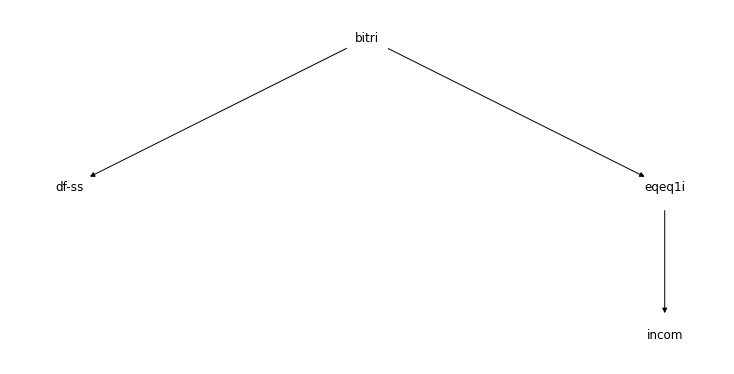

In [4]:
testp = construct_proof(database.propositions["sseqin2"])
testp.expand().get_root_step().print_graph()

dfss2


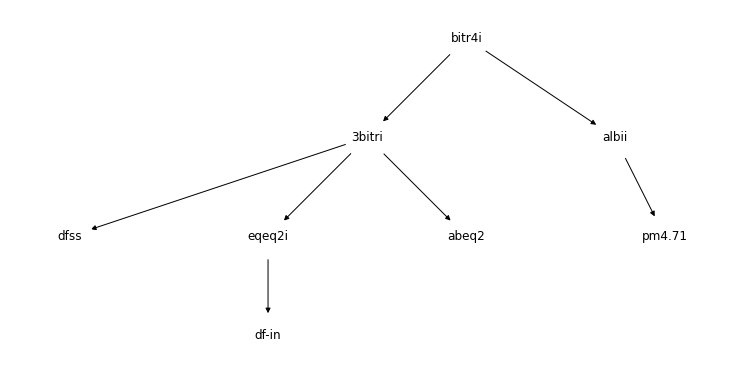

 <PStep:bitr4i ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A → x ∈ B ) )>
 |  <PStep:3bitri ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  |  <PStep:dfss ⊢ ( A ⊆ B ↔ A = ( A ∩ B ) )>
 |  |  <PStep:eqeq2i ⊢ ( A = ( A ∩ B ) ↔ A = { x | ( x ∈ A ∧ x ∈ B ) } )>
 |  |  |  <PStep:df-in ⊢ ( A ∩ B ) = { x | ( x ∈ A ∧ x ∈ B ) }>
 |  |  <PStep:abeq2 ⊢ ( A = { x | ( x ∈ A ∧ x ∈ B ) } ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  <PStep:albii ⊢ ( ∀ x ( x ∈ A → x ∈ B ) ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  |  <PStep:pm4.71 ⊢ ( ( x ∈ A → x ∈ B ) ↔ ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>


In [3]:
prop = database.propositions["dfss2"]
#prop = database.propositions_list[-1]
print(prop.label)
prop_proof = construct_proof(prop)
prop_proof.print_graph()
prop_proof.print_linear()

In [11]:
theorems_usage = Counter()

for p in database.propositions_list:
    for s in p.entails_proof_steps:
        theorems_usage[s.prop.label] += 1

In [32]:
database.propositions["mp2"].hyps[-1].string

['|-', '(', 'ph', '->', '(', 'ps', '->', 'ch', ')', ')']

In [33]:
database.propositions["mp2"].hyps[-1].statement

['|-', '(', 'ph', '->', '(', 'ps', '->', 'ch', ')', ')']

In [80]:
#dir(database.propositions["mp2"].hyps[-1])

In [75]:
# wffs = set()
# classes = set()
# others = set()
# elems = set()

# for th, c in theorems_usage.items():
#     for h in database.propositions[th].hyps:
#         if h.type == "e":
#             if len(h.statement) == 2:
#                 wffs.add(h.statement[1])
#             else:
#                 for i, _ in enumerate(h.statement):
#                     if i < len(h.statement) -1 and h.statement[i+1] == "e.":
#                         elems.add(h.statement[i])
   
# print(wffs)
# print(elems)

def replace_leaves(tr):
    if len(tr.leaves) == 0:
        tr.value = "wph"
    else:
        for l in tr.leaves:
            replace_leaves(l)

    return tr

def normalize_tree(tr):
    return tree2str(replace_leaves(tr).copy(), True)

In [72]:
hyps_theorems_list = defaultdict(list)

for t, c in theorems_usage.items():
    for h in database.propositions[t].hyps:
        if h.type == "e":
            hyps_theorems_list[normalize_tree(h.tree)].append((t,c))

In [81]:
hyps_theorems_dist = {}
for norm_expr, theorems_list in hyps_theorems_list.items():
    sum_count = 0
    for _, c in set(theorems_list):
        sum_count += c
    
    hyps_theorems_dist[norm_expr] = dict()
    for t, c in set(theorems_list):
        hyps_theorems_dist[norm_expr][t] = c/sum_count

In [90]:
for expr, t_dict in hyps_theorems_dist.items():
    sum_val = sum([v for v in t_dict.values()])
    assert round(sum_val,8) == 1, sum_val
    #print(expr, sum([v for v in t_dict.values()]))

In [94]:
hyps_theorems_dist["ph"]["ax-mp"]

0.31340341655716164

In [100]:
prop_proof.inputs[0].output.label

'bitr4i'

In [102]:
for s in prop_proof.get_steps_df():
    try:
        if s.output != None:
            s_prob = hyps_theorems_dist[normalize_tree(s._step.prop.tree)][s.output.label]
            print(s, s_prob)
        else:
            print(s, 0)
    except:
        print(s)

<PStep:bitr4i ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A → x ∈ B ) )> 0
<PStep:3bitri ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )> 0.04329461457233368
<PStep:dfss ⊢ ( A ⊆ B ↔ A = ( A ∩ B ) )>
<PStep:eqeq2i ⊢ ( A = ( A ∩ B ) ↔ A = { x | ( x ∈ A ∧ x ∈ B ) } )>
<PStep:df-in ⊢ ( A ∩ B ) = { x | ( x ∈ A ∧ x ∈ B ) }>
<PStep:abeq2 ⊢ ( A = { x | ( x ∈ A ∧ x ∈ B ) } ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
<PStep:albii ⊢ ( ∀ x ( x ∈ A → x ∈ B ) ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
<PStep:pm4.71 ⊢ ( ( x ∈ A → x ∈ B ) ↔ ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>


In [104]:
prop_proof.get_steps_df()[1]._step.prop.tree

<Tree: wb(wph(),wph())>

In [ ]:
precisa criar uma forma de gerar expressoes candidatas porque expressoes possiveis sao aninhadas

talvez precise pensar sobre correlacao com os outros inputs

talvez poderia usar language models aqui

talvez o holophrams tenha algum metodo para verificar os teoremas validos 